Let's start here! If you can directly link to an image relevant to your notebook, such as [canonical logos](https://github.com/numpy/numpy/blob/main/doc/source/_static/numpylogo.svg), do so here at the top of your notebook. You can do this with Markdown syntax,

> `![<image title>](http://link.com/to/image.png "image alt text")`

or edit this cell to see raw HTML `img` demonstration. This is preferred if you need to shrink your embedded image. **Either way be sure to include `alt` text for any embedded images to make your content more accessible.**

<img src="../images/arm_logo.png" width=250 alt="ARM Logo"></img>

# ACT Tutorial Notebook and Blog Template

This template is a starting point for those looking to contribute a tutorial notebook, example workflow and blog posts to ACT using Jupyter Notebooks.

Next, title your notebook appropriately with a top-level Markdown header, `#`. Do not use this level header anywhere else in the notebook. Our book build process will use this title in the navbar, table of contents, etc. Keep it short, keep it descriptive. Follow this with a `---` cell to visually distinguish the transition to the prerequisites section.

---

## Overview
If you have an introductory paragraph, lead with it here! Keep it short and tied to your material, then be sure to continue into the required list of topics below,

1. This is a numbered list of the specific topics
1. These should map approximately to your main sections of content
1. Or each second-level, `##`, header in your notebook
1. Keep the size and scope of your notebook in check
1. And be sure to let the reader know up front the important concepts they'll be leaving with

## Prerequisites
This section was inspired by [this template](https://github.com/alan-turing-institute/the-turing-way/blob/master/book/templates/chapter-template/chapter-landing-page.md) of the wonderful [The Turing Way](https://the-turing-way.netlify.app) Jupyter Book.

Following your overview, tell your reader what concepts, packages, or other background information they'll **need** before learning your material or being able to use the code. Tie this explicitly with links to other pages here in Foundations or to relevant external resources. Remove this body text, then populate the Markdown table, denoted in this cell with `|` vertical brackets, below, and fill out the information following. In this table, lay out prerequisite concepts by explicitly linking to other Foundations material or external resources, or describe generally helpful concepts.

Label the importance of each concept explicitly as **helpful/necessary**.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Necessary | |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Helpful | Familiarity with metadata structure |
| Project management | Helpful | |

- **Time to learn**: estimate in minutes. For a rough idea, use 5 mins per subsection, 10 if longer; add these up for a total. Safer to round up and overestimate.
- **System requirements**:
    - Populate with any system, version, or non-Python software requirements if necessary
    - Otherwise use the concepts table above and the Imports section below to describe required packages as necessary
    - If no extra requirements, remove the **System requirements** point altogether

---

## Imports
Begin your body of content with another `---` divider before continuing into this section, then remove this body text and populate the following code cell with all necessary Python imports **up-front**:

In [1]:
import os

from arm_test_data import DATASETS
import matplotlib.pyplot as plt
import xarray as xr

import act

## Using comments

When creating these examples, it is good practive to include comments describing your code. For example:

In [2]:
# Creates a dictonary for datastreams used in plotting.
# For the template notebook, using fake datasets.
ds_psl = xr.Dataset()
ds_par = xr.Dataset()
data_dict = {"NOAA Site KPS PSL Radar FMCW": ds_psl, "NOAA Site KPS Parsivel": ds_par}

## Access ARM Data

For ACT, most of the data we use for examples, notebooks and blog post originate from the ARM Live API. In other cases, we use the data found at [ACT Sample Data](https://github.com/ARM-DOE/ACT/blob/main/act/tests/sample_files.py)

### Use the ARM Live API to Download the Data, using ACT

The Atmospheric Data Community Toolkit (ACT) has a helpful module to interface with the data server:
* [Download Data API](https://arm-doe.github.io/ACT/API/generated/act.discovery.download_data.html#act.discovery.download_data)

### Setup our Download Query
Before downloading our data, we need to make sure we have an ARM Data Account, and ARM Live token. Both of these can be found using this link:
- [ARM Live Signup](https://adc.arm.gov/armlive/livedata/home)

Once you sign up, you will see your token. Copy and replace that where we have `arm_username` and `arm_password` below.

In [3]:
arm_username = os.getenv("ARM_USERNAME")
arm_password = os.getenv("ARM_PASSWORD")

datastream = "sgpceilC1.b1"

start_date = "2022-01-01T12:00:00"
end_date = "2022-01-07T12:00:00"

files = act.discovery.download_data(arm_username,
                                    arm_password,
                                    datastream,
                                    start_date,
                                    end_date)

C:\Users\sherm\AppData\Local\Temp\ipykernel_11112\3818944164.py:12: DeprecationWarning: act.discovery.get_armfiles.download_data will be retired in version 2.0.0.  Please use act.discovery.get_arm.download_arm_data instead.
  files = act.discovery.download_data(arm_username,


[DOWNLOADING] sgpceilC1.b1.20220106.000003.nc
[DOWNLOADING] sgpceilC1.b1.20220107.000000.nc
[DOWNLOADING] sgpceilC1.b1.20220102.000011.nc
[DOWNLOADING] sgpceilC1.b1.20220103.000009.nc
[DOWNLOADING] sgpceilC1.b1.20220104.000008.nc
[DOWNLOADING] sgpceilC1.b1.20220105.000006.nc

If you use these data to prepare a publication, please cite:

Morris, V., Zhang, D., & Ermold, B. Ceilometer (CEIL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1181954



### Using sample data already within ACT

To use sample data already within ACT, use for example:

In [4]:
filename_sodar = DATASETS.fetch('sodar.20230404.mnd')
ds = act.io.read_mfas_sodar(act.tests.EXAMPLE_MFAS_SODAR)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


## Plotting data

Who doesn't like nice plots? Many of our examples, blog posts and tutorial notebooks contain plots to show the data we are working with. Below is an example on how to plot the example sodar data above and showing it in our example.

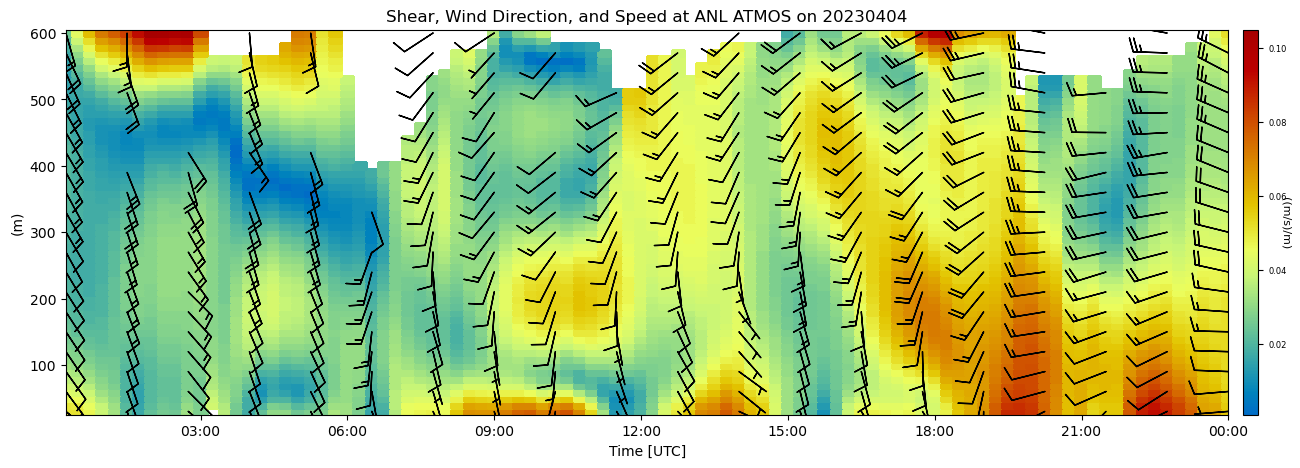

In [5]:
# Create an ACT TimeSeriesDisplay.
display = act.plotting.TimeSeriesDisplay(
    {'Shear, Wind Direction, and Speed at ANL ATMOS': ds},
    subplot_shape=(1,), figsize=(15, 5))

# Plot shear with a wind barb overlay, while using a color vision
# deficiency (CVD) colormap.
display.plot('shear', subplot_index=(0,), cb_friendly=True)
display.plot_barbs_from_spd_dir('speed', 'dir')
plt.show()

## Splitting our notebook in sections of information and code

With the code example above, it is great to split up your code and example into sections. Each section will be based on your overall goal and scope your trying to explain to the audience.

### A content subsection
Divide and conquer your objectives with Markdown subsections, which will populate the helpful navbar in Jupyter Lab and here on the Jupyter Book!

In [6]:
# some subsection code
new = "helpful information"

### Another content subsection
Keep up the good work! A note, *try to avoid using code comments as narrative*, and instead let them only exist as brief clarifications where necessary.

## Your second content section
Here we can move on to our second objective, and we can demonstrate

### Subsection to the second section

#### a quick demonstration

##### of further and further

###### header levels

as well $m = a * t / h$ text! Similarly, you have access to other $\LaTeX$ equation [**functionality**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) via MathJax (demo below from link),

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

Check out [**any number of helpful Markdown resources**](https://www.markdownguide.org/basic-syntax/) for further customizing your notebooks and the [**Jupyter docs**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) for Jupyter-specific formatting information. Don't hesitate to ask questions if you have problems getting it to look *just right*.

## Last Section

If you're comfortable, and as we briefly used for our embedded logo up top, you can embed raw html into Jupyter Markdown cells (edit to see):

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Scary stuff be here.
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

With the example code above and our format, we can create a notebook for users to use and learn about ACT, ACT data and open science.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!